<a href="https://colab.research.google.com/github/danlamberg/RegressaoLinear-DS/blob/main/Atividade_Regress%C3%A3o_Linear_Simples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ALUNO: DANIEL DE OLIVEIRA LAMBERG

RM: 12210919

TURMA: Data Science - Osório Sala 404 - QUA - 19:00 - 21:40

## Exercícios:

Faça um filtro por cidades como Campinas, São Paulo, etc para encontrar notas 

com distribuições normais para comparação.


A nota de redação é uma forte candidata a distribuição normal conforme os exercícios das últimas aulas.

Para ter uma maior variabilidade teste o conjunto em cidades com mais de 40 entradas.

Teste a normalidade da coluna de NOTA_REDACAO (qqplot e teste de hipotese)
Nao e necessário o comentário em cada célula.

Utilize os conceitos de correlação para identificar possíveis variáveis para aplicar regressão linear simples.

## **Correlação e Regressão**

In [40]:
import numpy as np
import pandas as pd

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
df_enem = pd.read_csv('/content/drive/MyDrive/BSI/DATA SCIENCE/Colab Notebooks/Aula08/enem_2019_tratado.csv',
                      sep=',', encoding='UTF-8')
df_enem

,INSCRICAO,MUNICIPIO_RESIDENCIA,IDADE,SEXO,ESTADO_CIVIL,COR_RACA,NACIONALIDADE,CONCLUSAO,ESCOLA,TREINEIRO,...,NOTA_MT,LINGUA,STATUS_REDACAO,NOTA_COMP1,NOTA_COMP2,NOTA_COMP3,NOTA_COMP4,NOTA_COMP5,NOTA_REDACAO,Q025
0,"1,90E+11",Santa Isabel,22,M,solteiro(a),parda,brasileiro(a),ja_concluiu,nao_declarado,nao,...,600.2,ingles,sem_problemas,160.0,200.0,180.0,200.0,200.0,940.0,B
1,"1,90E+11",São Paulo,17,F,solteiro(a),parda,brasileiro(a),conclui_2019,privada,nao,...,731.8,ingles,sem_problemas,160.0,120.0,200.0,200.0,200.0,880.0,A
2,"1,90E+11",São Bernardo do Campo,19,M,solteiro(a),parda,brasileiro(a),conclui_2019,publica,nao,...,393.2,espanhol,sem_problemas,80.0,160.0,120.0,100.0,100.0,560.0,B
3,"1,90E+11",Embu-Guaçu,17,F,solteiro(a),parda,brasileiro(a),conclui_2019,publica,nao,...,419.2,ingles,sem_problemas,120.0,120.0,120.0,120.0,80.0,560.0,B
4,"1,90E+11",Guarulhos,23,F,solteiro(a),branca,brasileiro(a),ja_concluiu,nao_declarado,nao,...,796.1,ingles,sem_problemas,160.0,200.0,180.0,180.0,160.0,880.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581166,"1,90E+11",São Paulo,18,F,solteiro(a),parda,brasileiro(a),ja_concluiu,nao_declarado,nao,...,479.1,espanhol,sem_problemas,100.0,120.0,120.0,140.0,100.0,580.0,B
581167,"1,90E+11",São Paulo,17,F,solteiro(a),preta,brasileiro(a),conclui_2019,publica,nao,...,43.2,espanhol,sem_problemas,80.0,120.0,140.0,120.0,100.0,560.0,B
581168,"1,90E+11",São Paulo,17,F,solteiro(a),parda,brasileiro(a),conclui_2019,publica,nao,...,487.3,ingles,sem_problemas,120.0,80.0,60.0,120.0,0.0,380.0,B
581169,"1,90E+11",São Paulo,17,M,solteiro(a),parda,brasileiro(a),conclui_2019,publica,nao,...,401.1,ingles,sem_problemas,160.0,120.0,160.0,140.0,160.0,740.0,A


### Filtrando cidades

In [43]:
df_enem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581171 entries, 0 to 581170
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   INSCRICAO             581171 non-null  object 
 1   MUNICIPIO_RESIDENCIA  581171 non-null  object 
 2   IDADE                 581171 non-null  int64  
 3   SEXO                  581171 non-null  object 
 4   ESTADO_CIVIL          581171 non-null  object 
 5   COR_RACA              581171 non-null  object 
 6   NACIONALIDADE         581171 non-null  object 
 7   CONCLUSAO             581171 non-null  object 
 8   ESCOLA                581171 non-null  object 
 9   TREINEIRO             581171 non-null  object 
 10  COD_ESCOLA            176894 non-null  float64
 11  PRESENCA_CN           581171 non-null  object 
 12  PRESENCA_CH           581171 non-null  object 
 13  PRESENCA_LC           581171 non-null  object 
 14  PRESENCA_MT           581171 non-null  object 
 15  

In [44]:
enem_araras = df_enem.loc[df_enem.MUNICIPIO_RESIDENCIA == 'Araras']
enem_araras

,INSCRICAO,MUNICIPIO_RESIDENCIA,IDADE,SEXO,ESTADO_CIVIL,COR_RACA,NACIONALIDADE,CONCLUSAO,ESCOLA,TREINEIRO,...,NOTA_MT,LINGUA,STATUS_REDACAO,NOTA_COMP1,NOTA_COMP2,NOTA_COMP3,NOTA_COMP4,NOTA_COMP5,NOTA_REDACAO,Q025
298,"1,90E+11",Araras,20,M,solteiro(a),parda,brasileiro(a),ja_concluiu,nao_declarado,nao,...,773.7,ingles,sem_problemas,160.0,120.0,160.0,180.0,160.0,780.0,B
358,"1,90E+11",Araras,18,F,solteiro(a),branca,brasileiro(a),conclui_2019,privada,nao,...,793.1,ingles,sem_problemas,180.0,200.0,200.0,200.0,180.0,960.0,B
603,"1,90E+11",Araras,30,F,solteiro(a),branca,brasileiro(a),ja_concluiu,nao_declarado,nao,...,408.7,espanhol,sem_problemas,120.0,120.0,120.0,100.0,120.0,580.0,B
667,"1,90E+11",Araras,27,F,solteiro(a),branca,brasileiro(a),ja_concluiu,nao_declarado,nao,...,693.3,ingles,sem_problemas,160.0,120.0,140.0,140.0,140.0,700.0,B
844,"1,90E+11",Araras,18,F,solteiro(a),preta,brasileiro(a),ja_concluiu,nao_declarado,nao,...,674.2,ingles,sem_problemas,160.0,200.0,180.0,180.0,160.0,880.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580416,"1,90E+11",Araras,17,M,solteiro(a),parda,brasileiro(a),conclui_2019,publica,nao,...,444.7,ingles,sem_problemas,120.0,120.0,120.0,120.0,80.0,560.0,B
580620,"1,90E+11",Araras,18,F,solteiro(a),parda,brasileiro(a),conclui_2019,publica,nao,...,456.6,ingles,sem_problemas,120.0,120.0,120.0,120.0,140.0,620.0,B
580669,"1,90E+11",Araras,18,M,solteiro(a),parda,brasileiro(a),conclui_2019,publica,nao,...,685.8,espanhol,sem_problemas,140.0,180.0,120.0,120.0,160.0,720.0,B
580919,"1,90E+11",Araras,18,M,solteiro(a),branca,brasileiro(a),conclui_2019,publica,nao,...,507.7,ingles,sem_problemas,120.0,40.0,40.0,120.0,0.0,320.0,B


In [45]:
enem_araras.shape

(1294, 28)

In [46]:
print("Maior nota registrada: " + str(enem_araras['NOTA_MT'].max()))

Maior nota registrada: 896.1


In [47]:
print("Menor nota registrada: " + str(enem_araras['NOTA_MT'].min()))

Menor nota registrada: 36.9


In [53]:
nota_final = ['NOTA_CN','NOTA_CH','NOTA_MT','NOTA_LC', 'NOTA_REDACAO']

In [54]:
enem_araras['nota_final'] = (enem_araras[nota_final].mean(axis=1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [55]:
enem_araras.head()

,INSCRICAO,MUNICIPIO_RESIDENCIA,IDADE,SEXO,ESTADO_CIVIL,COR_RACA,NACIONALIDADE,CONCLUSAO,ESCOLA,TREINEIRO,...,LINGUA,STATUS_REDACAO,NOTA_COMP1,NOTA_COMP2,NOTA_COMP3,NOTA_COMP4,NOTA_COMP5,NOTA_REDACAO,Q025,nota_final
298,"1,90E+11",Araras,20,M,solteiro(a),parda,brasileiro(a),ja_concluiu,nao_declarado,nao,...,ingles,sem_problemas,160.0,120.0,160.0,180.0,160.0,780.0,B,651.82
358,"1,90E+11",Araras,18,F,solteiro(a),branca,brasileiro(a),conclui_2019,privada,nao,...,ingles,sem_problemas,180.0,200.0,200.0,200.0,180.0,960.0,B,735.54
603,"1,90E+11",Araras,30,F,solteiro(a),branca,brasileiro(a),ja_concluiu,nao_declarado,nao,...,espanhol,sem_problemas,120.0,120.0,120.0,100.0,120.0,580.0,B,395.28
667,"1,90E+11",Araras,27,F,solteiro(a),branca,brasileiro(a),ja_concluiu,nao_declarado,nao,...,ingles,sem_problemas,160.0,120.0,140.0,140.0,140.0,700.0,B,532.12
844,"1,90E+11",Araras,18,F,solteiro(a),preta,brasileiro(a),ja_concluiu,nao_declarado,nao,...,ingles,sem_problemas,160.0,200.0,180.0,180.0,160.0,880.0,B,658.32


In [56]:
notas_enem_araras= enem_araras[['NOTA_CN','NOTA_MT','NOTA_LC','NOTA_CH','NOTA_REDACAO','nota_final']]

In [57]:
notas_enem_araras

,NOTA_CN,NOTA_MT,NOTA_LC,NOTA_CH,NOTA_REDACAO,nota_final
298,520.4,773.7,547.2,637.8,780.0,651.82
358,628.9,793.1,625.6,670.1,960.0,735.54
603,403.8,408.7,536.5,47.4,580.0,395.28
667,588.7,693.3,63.0,615.6,700.0,532.12
844,585.6,674.2,566.3,585.5,880.0,658.32
...,...,...,...,...,...,...
580416,517.4,444.7,539.8,568.1,560.0,526.00
580620,464.6,456.6,505.1,459.9,620.0,501.24
580669,608.8,685.8,570.1,598.8,720.0,636.70
580919,42.4,507.7,53.5,510.2,320.0,286.76


## Gráfico de correlação

In [61]:
import seaborn as sns

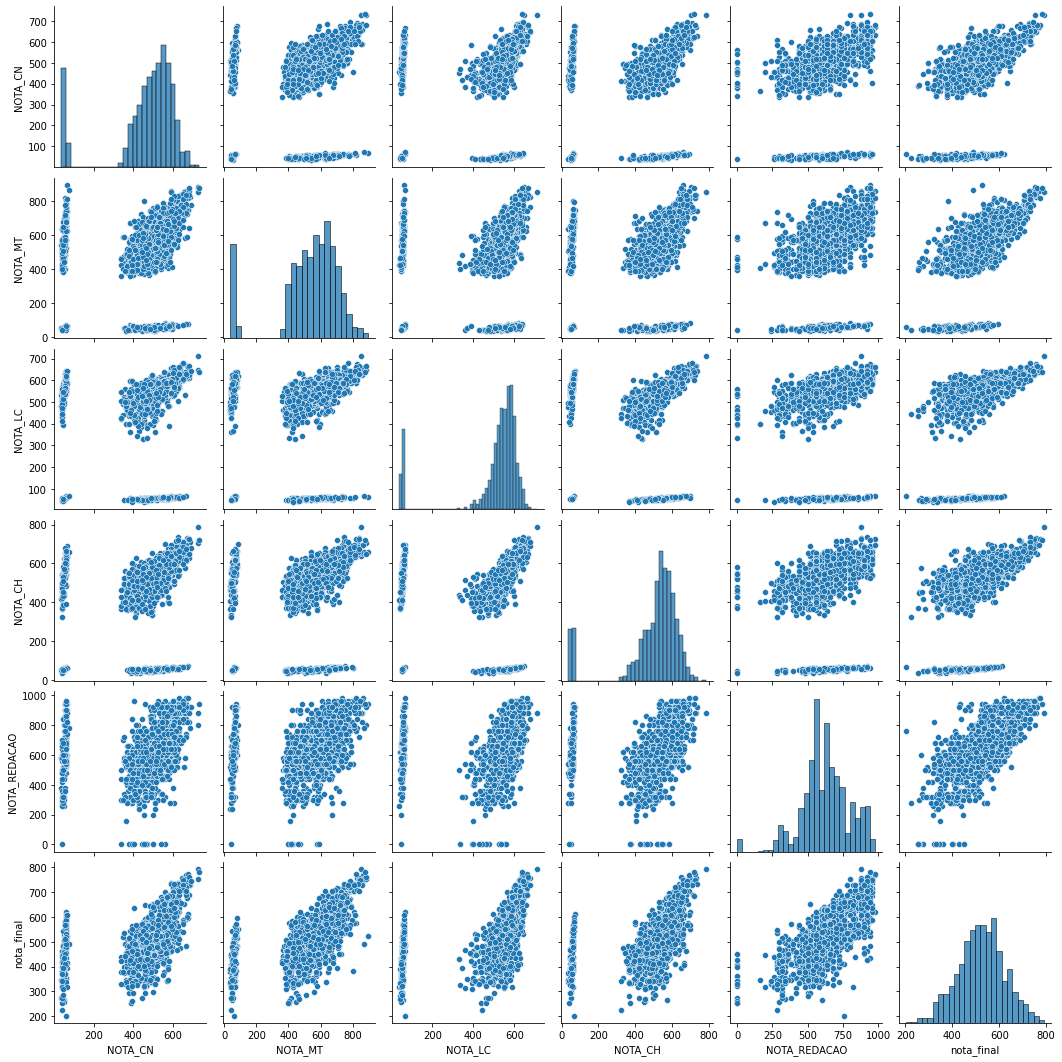

In [62]:
sns.pairplot(notas_enem_araras)

## **MATPLOTLIB**

In [63]:
import matplotlib.pyplot as plt

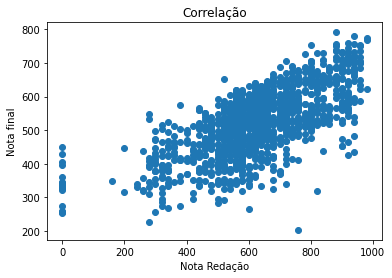

In [64]:
plt.scatter(notas_enem_araras.NOTA_REDACAO,notas_enem_araras.nota_final)
plt.title('Correlação')
plt.xlabel('Nota Redação')
plt.ylabel('Nota final')
plt.grid(False)
plt.show()

In [65]:
correlacoes = notas_enem_araras.corr(method='pearson')
correlacoes

,NOTA_CN,NOTA_MT,NOTA_LC,NOTA_CH,NOTA_REDACAO,nota_final
NOTA_CN,1.000000,0.189934,0.044594,0.112734,0.241039,0.544109
NOTA_MT,0.189934,1.000000,0.077458,0.167889,0.311266,0.639679
NOTA_LC,0.044594,0.077458,1.000000,0.090034,0.159260,0.460703
NOTA_CH,0.112734,0.167889,0.090034,1.000000,0.255598,0.550739
NOTA_REDACAO,0.241039,0.311266,0.159260,0.255598,1.000000,0.682906
nota_final,0.544109,0.639679,0.460703,0.550739,0.682906,1.000000


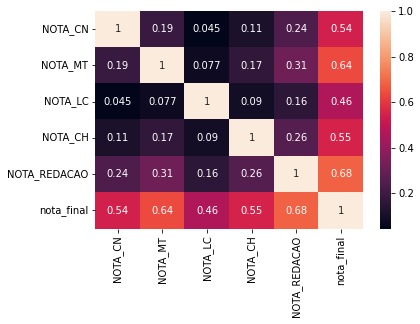

In [66]:
plt.figure()
sns.heatmap(correlacoes, annot=True);

## Teste de normalidade

*Teste Lilliefors*

In [71]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

In [72]:
statsmodels.stats.diagnostic.lilliefors(notas_enem_araras.NOTA_REDACAO, dist = 'norm')

(0.07652570003015771, 0.0009999999999998899)

*Teste de Shapiro-Wilk*

In [73]:
import scipy.stats as stats

In [74]:
stats.shapiro(notas_enem_araras.NOTA_REDACAO)

ShapiroResult(statistic=0.9668383002281189, pvalue=1.2504284179172206e-16)

In [75]:
stats.shapiro(notas_enem_araras.nota_final)

ShapiroResult(statistic=0.997848391532898, pvalue=0.088262178003788)

In [76]:
stats.shapiro(notas_enem_araras.NOTA_MT)

ShapiroResult(statistic=0.8661166429519653, pvalue=7.417459279006472e-32)

In [77]:
stats.shapiro(notas_enem_araras.NOTA_CN)

ShapiroResult(statistic=0.7758525609970093, pvalue=8.311944773586014e-39)

In [78]:
stats.shapiro(notas_enem_araras.NOTA_LC)

ShapiroResult(statistic=0.6436320543289185, pvalue=1.401298464324817e-45)

In [79]:
stats.shapiro(notas_enem_araras.NOTA_CH)

ShapiroResult(statistic=0.7545240521430969, pvalue=4.162094659783642e-40)

**QQPLOT**

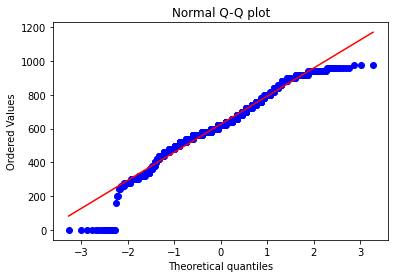

In [80]:
stats.probplot(notas_enem_araras['NOTA_REDACAO'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

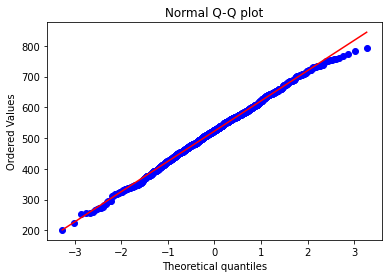

In [81]:
stats.probplot(notas_enem_araras['nota_final'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()